# Óbitos por COVID-19 Brasil

Author: P. H. P. Cintra

Website: [https://sites.google.com/view/pedrocintra](https://sites.google.com/view/pedrocintra)

Twitter/Instagram: [@pedrocintra52](https://www.instagram.com/pedrocintra52)

$$\hspace{1cm}$$

Bem vindo/Bem vinda/Bem vinde, neste jupyter notebook encontra-se o código utilizado por mim para estimar o número mais próximo do real de óbitos por COVID-19 no Brasil. Para isso, utilizo os dados do portal [Bigdata-covid19](https://bigdata-covid19.icict.fiocruz.br/) da Fiocruz e os dados do [OurWorldInData](https://ourworldindata.org/coronavirus). Utilizando a comparação entre óbitos por síndrome respiratória aguda grave (SRAG) nos anos de 2018 e 2019, e o ano de 2020, eu estimo o real numero de óbitos por COVID-19 no final de 2020/início de 2021. Com esta estiamtiva, eu estimo qual a % de subnotificação de mortes no Brasil e finalmente, utilizo os dados atuais de mortes registradas para estimar qual o numero real de mortos por COVID-19 no Brasil. Alguns pontos devem ser discutidos antes disso:

1. Ao comparar os anos anteriores de 2018/2019 com 2020, verei o quanto o ano de 2020 está em excesso comparado à média dos anteriores. Entretanto, pode-se argumentar que o ano de 2020 pode ter tido mais casos de doenças respiratórias, alem da COVID, o que naturalmente aumentaria o registro de óbitos por SRAG naturalmente. O problema deste argumento é que, devido ao isolamento social, a tendência é que os casos de SRAG causados por outros agentes infecciosos (como o Influenza, que causa a gripe) diminua. Porém, para evitar este possível viés, irei comparar o excesso de 2020 com a média de 2018/2019 + 2 desvios padrões (2$\sigma$), para eliminar deste excesso a possibilidade de que esteja contaminando a estiamtiva com óbitos de SRAG que não foram de COVID.
2. Após encontrar a % de subnotificação de mortes, eu suponho que este valor não se altere até os dias atuais,veremos que a % de subnotificação tendeu a aumentar no ano de 2020, mas se estabilizou nas últimas 20 semanas epidemiológicas, indicando que esta suposição é válida.
3. A análise que farei consta com dados baixados no dia 05/03/2021, sinta-se livre para acessar os links mencionados anteriormente e baixar os dados mais recentes do [OurWorldInData](https://ourworldindata.org/coronavirus) e do [Bigdata-covid19](https://bigdata-covid19.icict.fiocruz.br/) para fazer uma estimativa mais recente.

In [1]:
# Importando bibliotecas
import pandas as pd # Para importar arquivos e dados
import numpy as np # Funções e conceitos matemáticos
import matplotlib.pyplot as plt # Gráficos

In [2]:
# Importando os dados do repositório no GitHub
fiocruz = pd.read_csv('https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/master/fiocruz_sivep_gripe.csv')
owid = pd.read_csv('https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/master/owid-covid-data.csv')

In [3]:
fiocruz.head()

,Semana epidemiológicaobito 2018,SRAG: óbitosobito 2018,Semana epidemiológicaobito 2019,SRAG: óbitosobito 2019,Semana epidemiológicaobito 2020,SRAG: óbitosobito 2020,Semana epidemiológicaobitocovid 2020,SRAG: óbitosobitocovid 2020,Semana epidemiológicaobitocovid 2021,SRAG: óbitosobitocovid 2021,Semana epidemiológicaÓbitos MS,SRAG: óbitosÓbitos MS
0,1.0,49.0,1.0,44.0,1,82,1,0,1.0,6009.0,1,6906
1,2.0,91.0,2.0,85.0,2,167,2,0,2.0,11589.0,2,13571
2,3.0,127.0,3.0,130.0,3,253,3,0,3.0,16155.0,3,20720
3,4.0,160.0,4.0,172.0,4,336,4,0,4.0,19775.0,4,28220
4,5.0,197.0,5.0,209.0,5,442,5,0,5.0,23282.0,5,35287


In [4]:
# Media e desvio padrão de 2019 e 2018
mean_early_years = np.mean([np.array(fiocruz['SRAG: óbitosobito 2018']),
                            np.array(fiocruz['SRAG: óbitosobito 2019'])], axis = 0)
std_early_years = np.std([np.array(fiocruz['SRAG: óbitosobito 2018']),
                          np.array(fiocruz['SRAG: óbitosobito 2019'])], axis=0)

Text(0.5, 1.0, 'Óbitos por SRAG nos anos de 2018 e 2019')

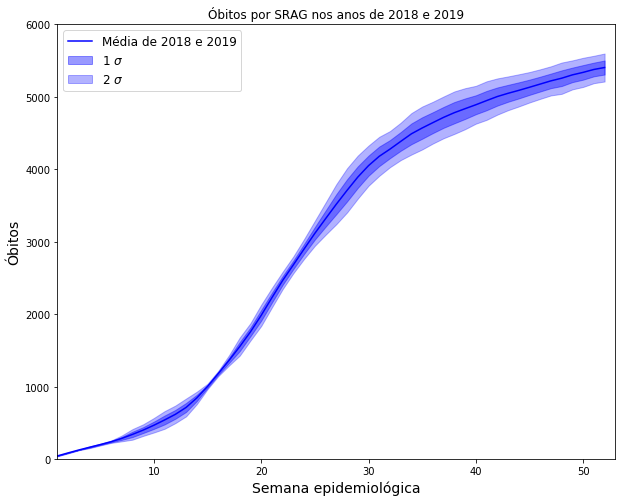

In [5]:
# Comportamento médio de 2019 e 2018
plt.figure(figsize=(10,8))
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2019']), mean_early_years,
        color = 'blue', label = 'Média de 2018 e 2019')
plt.fill_between(np.array(fiocruz['Semana epidemiológicaobito 2019']), mean_early_years-std_early_years, 
                mean_early_years + std_early_years, alpha = 0.4, color = 'blue', label = r'1 $\sigma$')
plt.fill_between(np.array(fiocruz['Semana epidemiológicaobito 2019']), mean_early_years-2*std_early_years, 
                mean_early_years + 2*std_early_years, alpha = 0.3, color = 'blue', label = r'2 $\sigma$')
plt.legend(loc='upper left', fontsize = 12)
plt.xlabel('Semana epidemiológica', fontsize = 14)
plt.ylabel('Óbitos', fontsize = 14)
plt.xlim(1, 53)
plt.ylim(0, 6000)
plt.title('Óbitos por SRAG nos anos de 2018 e 2019')

Text(0.5, 1.0, '*SRAG = Síndrome Respiratória Aguda Grave')

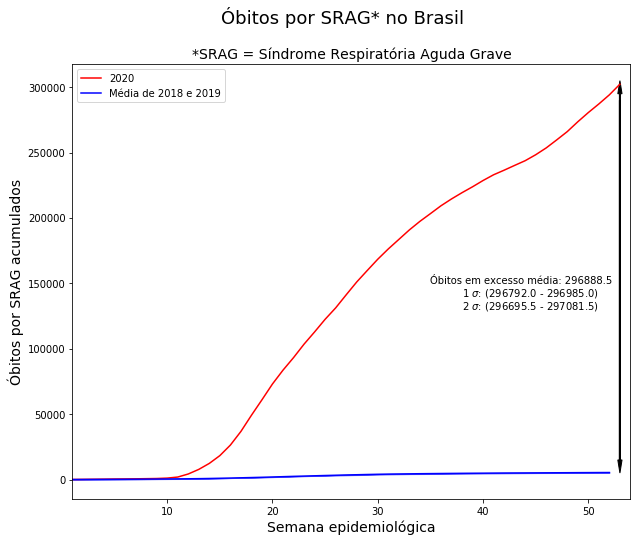

In [6]:
# 2020
plt.figure(figsize=(10,8))
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2020']), np.array(fiocruz['SRAG: óbitosobito 2020']),
        color = 'red', label = '2020')
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2019']), mean_early_years,
        color = 'blue', label = 'Média de 2018 e 2019')
plt.fill_between(np.array(fiocruz['Semana epidemiológicaobito 2019']), mean_early_years-std_early_years, 
                mean_early_years + std_early_years, alpha = 0.4, color = 'blue')
plt.fill_between(np.array(fiocruz['Semana epidemiológicaobito 2019']), mean_early_years-2*std_early_years, 
                mean_early_years + 2*std_early_years, alpha = 0.3, color = 'blue')
plt.legend(loc='upper left')
plt.xlim(1, 54)
plt.arrow(53, 10000, 0, 285000, width = 0.1, head_width = 0.4, head_length = 10000, color = 'black')
plt.arrow(53, 290000, 0, -275000, width = 0.1, head_width = 0.4, head_length = 10000, color = 'black')
plt.text(35, 150000, f"Óbitos em excesso média: {np.array(fiocruz['SRAG: óbitosobito 2020'])[-1] - mean_early_years[-2]}")
plt.text(38, 140000,
         f"1 $\sigma$: ({np.array(fiocruz['SRAG: óbitosobito 2020'])[-1]-mean_early_years[-2]-std_early_years[-2]} - {np.array(fiocruz['SRAG: óbitosobito 2020'])[-1]-mean_early_years[-2]+std_early_years[-2]})")
plt.text(38, 130000,
         f"2 $\sigma$: ({np.array(fiocruz['SRAG: óbitosobito 2020'])[-1]-mean_early_years[-2]-2*std_early_years[-2]} - {np.array(fiocruz['SRAG: óbitosobito 2020'])[-1]-mean_early_years[-2]+2*std_early_years[-2]})")
plt.xlabel('Semana epidemiológica', fontsize = 14)
plt.ylabel('Óbitos por SRAG acumulados', fontsize = 14)
plt.suptitle('Óbitos por SRAG* no Brasil', fontsize = 18)
plt.title('*SRAG = Síndrome Respiratória Aguda Grave', fontsize = 14)

Text(0, 0.5, 'Óbitos')

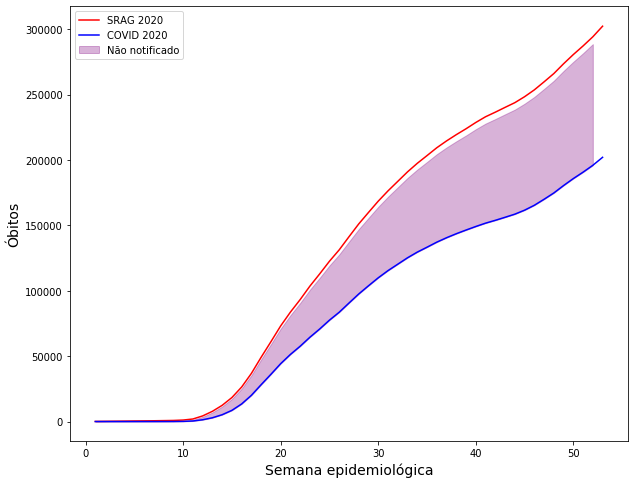

In [7]:
# Diferença entre óbito registrado como COVID e óbito de SRAG total com a subnotificação estimada
plt.figure(figsize=(10,8))
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2020']), np.array(fiocruz['SRAG: óbitosobito 2020']),
        color = 'red', label = 'SRAG 2020')
plt.plot(np.array(fiocruz['Semana epidemiológicaobitocovid 2020']), np.array(fiocruz['SRAG: óbitosobitocovid 2020']),
        color = 'blue', label = 'COVID 2020')
plt.fill_between(fiocruz['Semana epidemiológicaobito 2020'], np.array(fiocruz['SRAG: óbitosobitocovid 2020']),
                np.array(fiocruz['SRAG: óbitosobito 2020'])-mean_early_years-2*std_early_years, color = 'purple', alpha = 0.3, label = 'Não notificado')
plt.legend(loc = 'upper left')
plt.xlabel('Semana epidemiológica', fontsize = 14)
plt.ylabel('Óbitos', fontsize = 14)

In [8]:
# Calculo da subnotificação durante o período de 2020
subnotification = np.array(fiocruz['SRAG: óbitosobitocovid 2020'])/(np.array(fiocruz['SRAG: óbitosobito 2020']) - mean_early_years)
subnotification_std = np.array(fiocruz['SRAG: óbitosobitocovid 2020'])/(np.array(fiocruz['SRAG: óbitosobito 2020']) - mean_early_years - std_early_years)

Text(0, 0.5, '% de casos a mais além dos notificados')

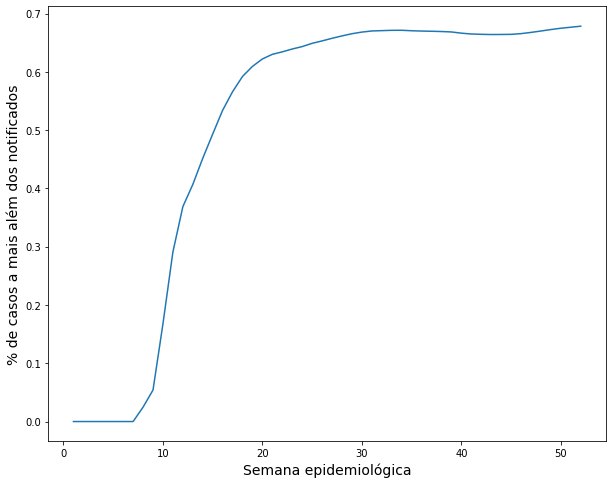

In [9]:
# Andamento da subnotificação durante 2020
plt.figure(figsize=(10,8))
plt.plot(np.array(fiocruz['Semana epidemiológicaobito 2020']), subnotification)
plt.xlabel('Semana epidemiológica', fontsize = 14)
plt.ylabel('% de casos a mais além dos notificados', fontsize = 14)

In [10]:
# Valor mais recente de subnotificação
subnotification_recent = subnotification[-2]
subnotification_recent_std = subnotification_std[-2] - subnotification_recent

In [11]:
print(f'Subnotificação equivalente a {100*subnotification_recent:.2f} +/- {200*subnotification_recent_std:.2f}% do registrado')

Subnotificação equivalente a 67.84 +/- 0.05% do registrado


In [12]:
# Valor mais recente de mortes no Brasil
Brasil = owid[owid['location'] == 'Brazil']
last_register = np.array(Brasil['total_deaths'])[-1]

In [13]:
# Estimativa do valor mais realístico de mortes no Brasil
actual_deaths = (1+subnotification_recent)*last_register
actual_deaths_std = (1+2*subnotification_recent_std)*last_register - last_register

In [14]:
print(f'Numero mais realístico de mortos por COVID-19 no Brasil até o momento: {int(actual_deaths)} +/- {int(actual_deaths_std)}')

Numero mais realístico de mortos por COVID-19 no Brasil até o momento: 438022 +/- 118
